In [1]:
import nb_utils
import torch
import numpy as np
import matplotlib.pyplot as plt
from lightning_modules.BaseSdeGenerativeModel import BaseSdeGenerativeModel
from models.fcn import FCN
import pickle
from plot_utils import plot_spectrum

Moving cwd to /store/CIA/js2164/repos/diffusion/score_sde_pytorch


/store/CIA/js2164/conda_envs/score_sde/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
#path = 'logs/ksphere/n_1/dim_10/random_isometry/uniform_random/svd/svd_9000.pkl'
#path = 'logs/ksphere/n_1/dim_50/random_isometry/uniform_random/svd/svd_14000.pkl'
#path = 'logs/line/sine_line/svd/svd_26500.pkl'
path = 'logs/mammoth/ve_random/svd/svd_16500.pkl'


In [48]:
list(range(1,10+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [42]:
with open(path, 'rb') as f:
    svd = pickle.load(f)

In [43]:
import importlib
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_spectrum, plot_distribution

Aggregation mode: all


[2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

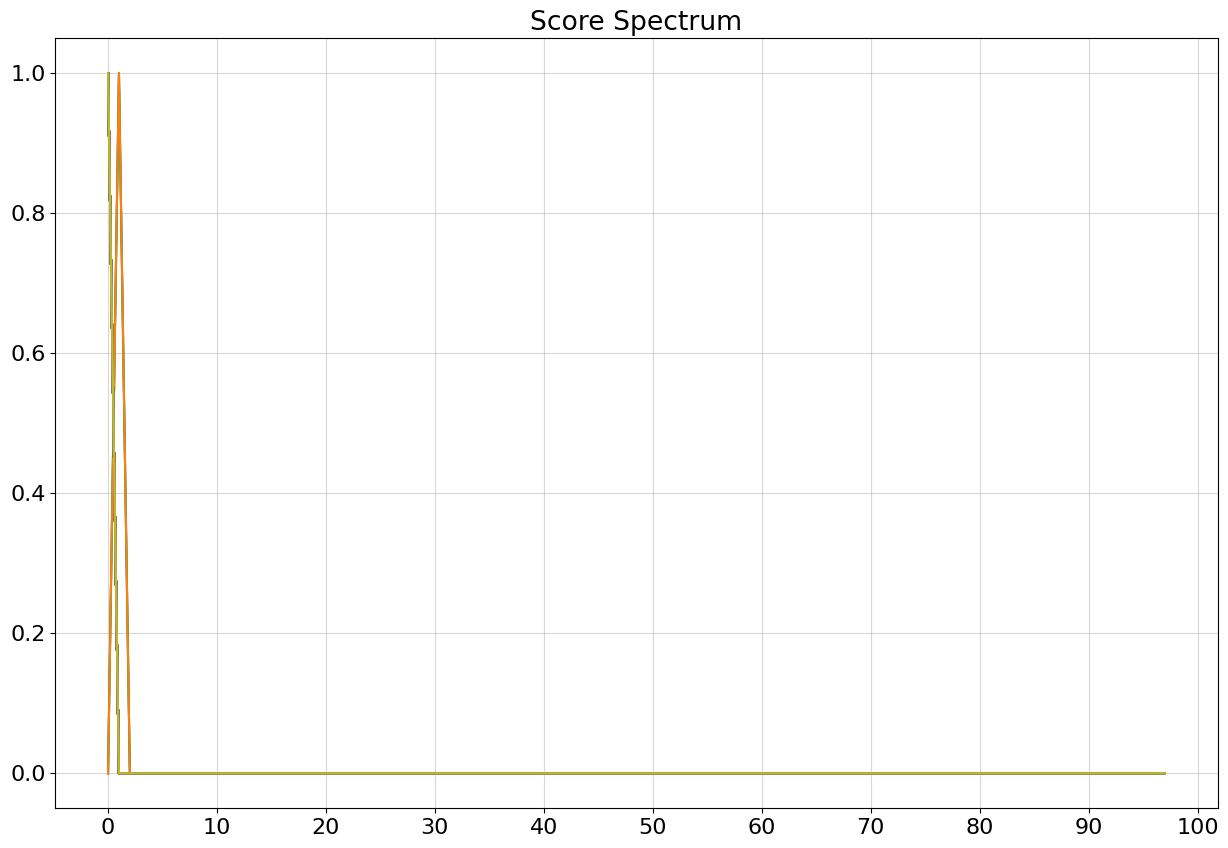

In [44]:
plot_distribution(svd, mode='all')